C:\Users\nejat\AppData\Local\Temp\ipykernel_2588\276172833.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_path)
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


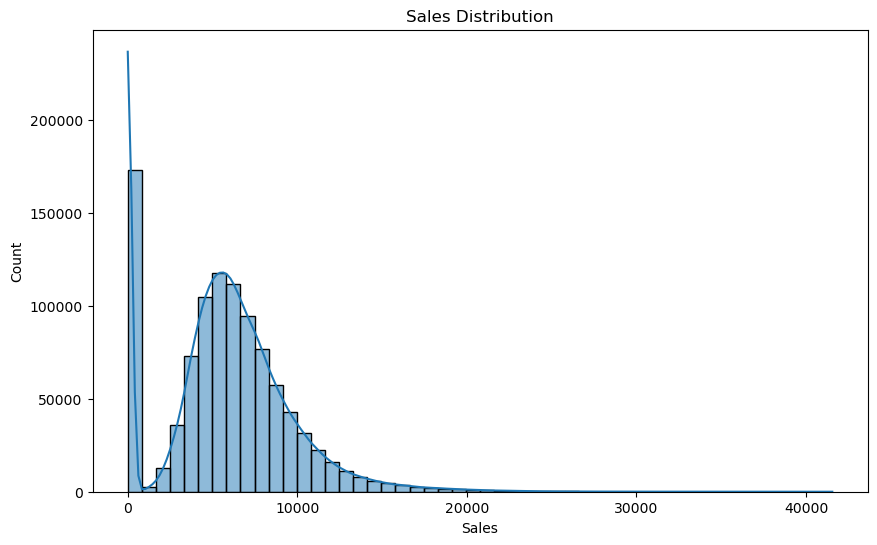

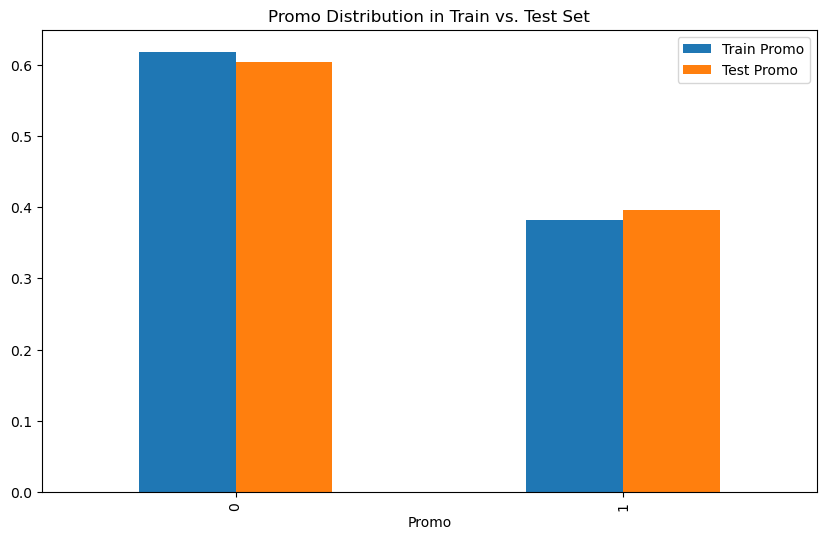

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


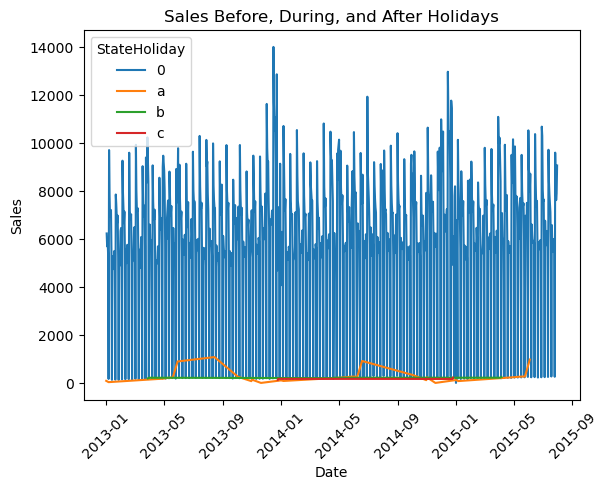

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


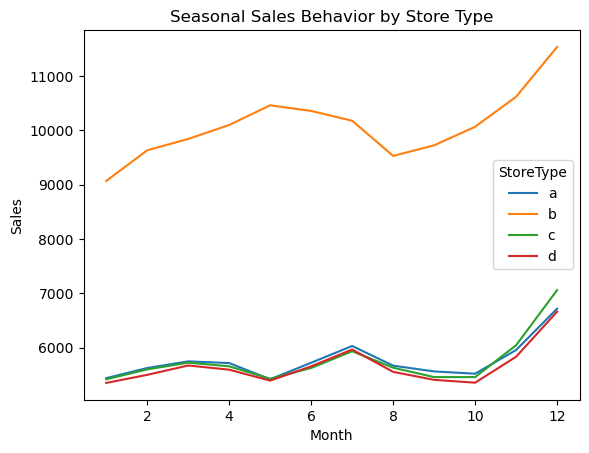

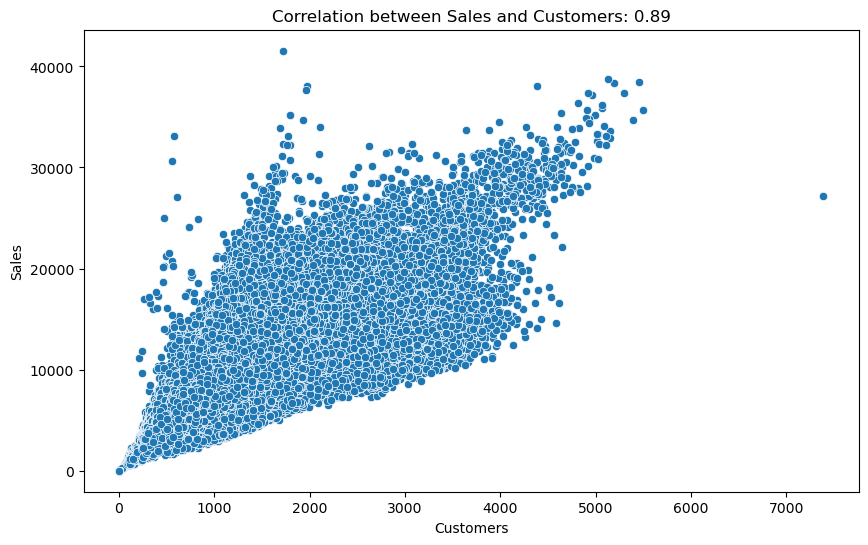

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


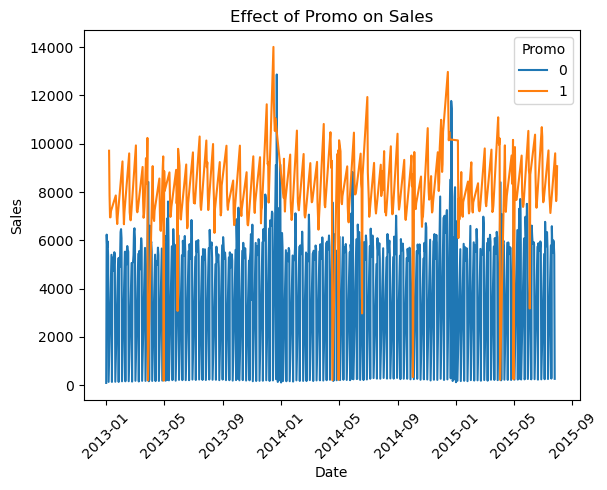

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


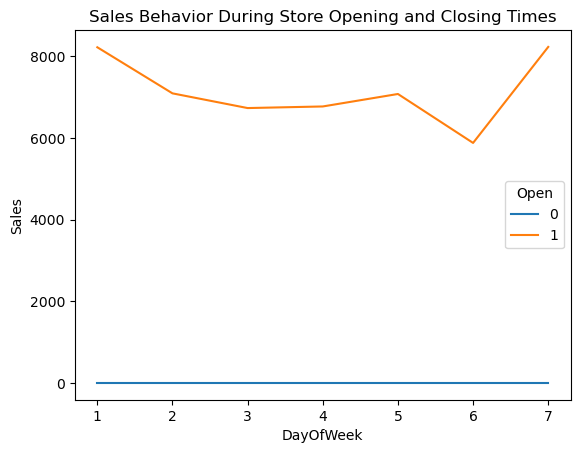

In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import numpy as np # type: ignore
from scipy.stats import pearsonr # type: ignore
import logging

logging.basicConfig(filename='../logs/rossmann_analysis.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

train_path = 'C:/Users/nejat/AIM Projects/week4 data/train.csv'
test_path = 'C:/Users/nejat/AIM Projects/week4 data/test.csv'
store_path = 'C:/Users/nejat/AIM Projects/week4 data/store.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
store = pd.read_csv(store_path)

train = train.merge(store, on='Store', how='left')
test = test.merge(store, on='Store', how='left')

train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['WeekOfYear'] = train['Date'].dt.isocalendar().week

def sales_distribution(train):
    plt.figure(figsize=(10, 6))
    sns.histplot(train['Sales'], bins=50, kde=True)
    plt.title('Sales Distribution')
    plt.show()
    logging.info("Sales distribution plot created.")

def promo_distribution(train, test):
    train_promo = train['Promo'].value_counts(normalize=True)
    test_promo = test['Promo'].value_counts(normalize=True)
    promo_df = pd.DataFrame({'Train Promo': train_promo, 'Test Promo': test_promo})
    promo_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Promo Distribution in Train vs. Test Set')
    plt.show()
    logging.info("Promo distribution comparison plot created.")

def holiday_sales_analysis(train):
    train['StateHoliday'] = train['StateHoliday'].astype(str)
    holiday_sales = train.groupby(['StateHoliday', 'Date']).agg({'Sales': 'mean'}).reset_index()
    sns.lineplot(data=holiday_sales, x='Date', y='Sales', hue='StateHoliday')
    plt.title('Sales Before, During, and After Holidays')
    plt.xticks(rotation=45)
    plt.show()
    logging.info("Holiday sales analysis plot created.")

def seasonal_behavior_analysis(train):
    seasonal_sales = train.groupby(['Month', 'StoreType']).agg({'Sales': 'mean'}).reset_index()
    sns.lineplot(data=seasonal_sales, x='Month', y='Sales', hue='StoreType')
    plt.title('Seasonal Sales Behavior by Store Type')
    plt.show()
    logging.info("Seasonal behavior analysis plot created.")

def correlation_sales_customers(train):
    corr, _ = pearsonr(train['Sales'], train['Customers'])
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Customers', y='Sales', data=train)
    plt.title(f'Correlation between Sales and Customers: {corr:.2f}')
    plt.show()
    logging.info(f"Correlation between Sales and Customers: {corr:.2f}")

def promo_effect_analysis(train):
    promo_sales = train.groupby(['Promo', 'Date']).agg({'Sales': 'mean'}).reset_index()
    sns.lineplot(data=promo_sales, x='Date', y='Sales', hue='Promo')
    plt.title('Effect of Promo on Sales')
    plt.xticks(rotation=45)
    plt.show()
    logging.info("Promo effect on sales analysis plot created.")

def store_opening_behavior(train):
    train['Open'] = train['Open'].fillna(1)  # Fill missing 'Open' values with 1 (open)
    opening_sales = train.groupby(['Open', 'DayOfWeek']).agg({'Sales': 'mean'}).reset_index()
    sns.lineplot(data=opening_sales, x='DayOfWeek', y='Sales', hue='Open')
    plt.title('Sales Behavior During Store Opening and Closing Times')
    plt.show()
    logging.info("Customer behavior during store opening and closing analyzed.")

sales_distribution(train)
promo_distribution(train, test)
holiday_sales_analysis(train)
seasonal_behavior_analysis(train)
correlation_sales_customers(train)
promo_effect_analysis(train)
store_opening_behavior(train)

logging.info("Exploratory Data Analysis completed.")

